<a href="https://colab.research.google.com/github/awikner/CHyPP/blob/master/TREND_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries and sklearn and skimage modules.

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from skimage.util import invert

## Load in the mnist handwritten number dataset from the openml library. The X array contains images of handwritten numbers, while the y array contains their known classification.

In [14]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

## We plot a few of the number images and their known classifications in greyscale.

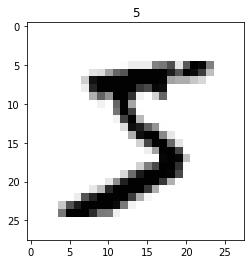

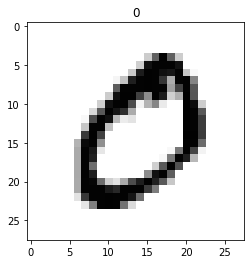

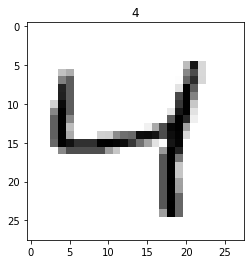

In [15]:
plt.imshow(invert(X[0].reshape(28,28)),interpolation='nearest',cmap="gray")
plt.title(str(y[0]))
plt.show()

plt.imshow(invert(X[1].reshape(28,28)),interpolation='nearest',cmap="gray")
plt.title(str(y[1]))
plt.show()

plt.imshow(invert(X[2].reshape(28,28)),interpolation='nearest',cmap="gray")
plt.title(str(y[2]))
plt.show()


## Before we can begin classification, we must train our model. We begin by breaking up our data set into training and testing sets.

In [52]:
train_samples = 800
# train_samples = 8000
test_samples = 10000
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = train_samples, test_size = test_samples)

## We use sklearn to create our logistic regression classifier. We then fit it to our training data.

In [53]:
classifier = LogisticRegression(solver = 'saga', penalty = 'l1', tol = 1e-2)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

## We test the accuracy of our trained classifier using the accuracy score method on the training and testing data sets. This computes the number of accurately predicted classes over the total number of samples. Note that the in-sample (training) accuracy is much higher than the out-of-sample (test) accuracy.

In [54]:
score_train = classifier.score(X_train,y_train)
score_test  = classifier.score(X_test,y_test)

print('Accuracy score for training data: ',score_train)
print('Accuracy score for test data: ',score_test)

Accuracy score for training data:  0.973
Accuracy score for test data:  0.8936


## Finally, we plot a few test images to show how our classifier has classified them.

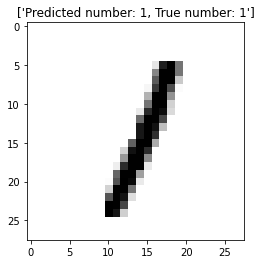

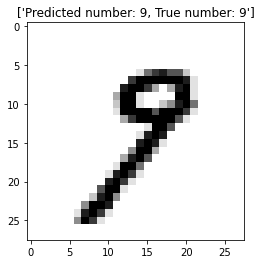

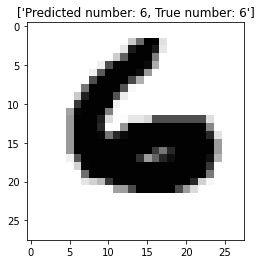

In [56]:
offset = 23

y0_test = classifier.predict(X_test[0 + offset].reshape(-1,X_test.shape[1]))
plt.imshow(invert(X_test[0 + offset].reshape(28,28)),interpolation='nearest',cmap="gray")
plt.title('Predicted number: '+y0_test+', True number: '+y_test[0+offset])
plt.show()

y1_test = classifier.predict(X_test[1 + offset ].reshape(-1,X_test.shape[1]))
plt.imshow(invert(X_test[1 + offset].reshape(28,28)),interpolation='nearest',cmap="gray")
plt.title('Predicted number: '+y1_test+', True number: '+y_test[1+offset])
plt.show()

y2_test = classifier.predict(X_test[2 + offset].reshape(-1,X_test.shape[1]))
plt.imshow(invert(X_test[2 + offset].reshape(28,28)),interpolation='nearest',cmap="gray")
plt.title('Predicted number: '+y2_test+', True number: '+y_test[2+offset])
plt.show()